## Name : Devashish Mahajan
## Dataset: AusGas.csv (Time-series data)
### Models used: 
### 1. AutoReg (auto regression)
### 2. ARIMA (autoregressive integrated moving average)
### 3. auto_arima

* Time-series forecasting is the process of using a model to predict future values based on previously observed values. 

* Time-series data is a sequence of data points, typically ordered in time. 

* Forecasting models usually make predictions at regular intervals, such as hourly, daily, or weekly. 

* Machine learning can be used to develop time-series forecasting models. This type of model is trained on past data and can be used to make predictions about future events. 

* Time series forecasting is a valuable tool for businesses that can help them to make decisions about future production, staffing, and inventory levels. 

* It can also be used to predict consumer demand and trends.

In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings(action='ignore')

from statsmodels.tools.print_version import show_versions
show_versions (show_dirs = True)
#statsmodels versions = 0.13.2
#Python: 3.9.7


INSTALLED VERSIONS
------------------
Python: 3.9.7.final.0

statsmodels

Installed: 0.13.2 (C:\Users\Devashish\anaconda3\lib\site-packages\statsmodels)

Required Dependencies

cython: Not installed
numpy: 1.22.3 (C:\Users\Devashish\anaconda3\lib\site-packages\numpy)
scipy: 1.7.3 (C:\Users\Devashish\anaconda3\lib\site-packages\scipy)
pandas: 1.3.5 (C:\Users\Devashish\anaconda3\lib\site-packages\pandas)
    dateutil: 2.8.2 (C:\Users\Devashish\anaconda3\lib\site-packages\dateutil)
patsy: 0.5.2 (C:\Users\Devashish\anaconda3\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 3.5.1 (C:\Users\Devashish\anaconda3\lib\site-packages\matplotlib)
    backend: module://matplotlib_inline.backend_inline 
cvxopt: Not installed
joblib: 1.1.0 (C:\Users\Devashish\anaconda3\lib\site-packages\joblib)

Developer Tools

IPython: 8.4.0 (C:\Users\Devashish\anaconda3\lib\site-packages\IPython)
    jinja2: 2.11.3 (C:\Users\Devashish\anaconda3\lib\site-packages\jinja2)
sphinx: 5.0.2 (C:\Users\Devashis

# Read csv files as Pandas Dataframe

In [2]:
# Change the file path as the file path in your computer
# Read csv files from kaggle dataset as Pandas Dataframe
df = pd.read_csv("AusGas.csv")
df.head()

,Month,GasProd
0,Jan-1956,1709
1,Feb-1956,1646
2,Mar-1956,1794
3,Apr-1956,1878
4,May-1956,2173


In [3]:
# No of rows in dataset
df.shape

(476, 2)

# Exploratory Data Analysis (EDA)

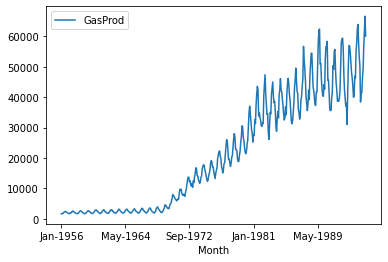

In [4]:
# Plot line graph
df.plot.line(x = 'Month',y = 'GasProd')
plt.show()

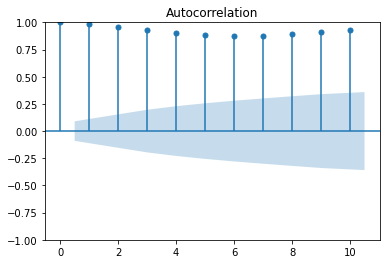

In [5]:
# plot_acf  (auto correlation function)
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['GasProd'], lags=10)
plt.show()

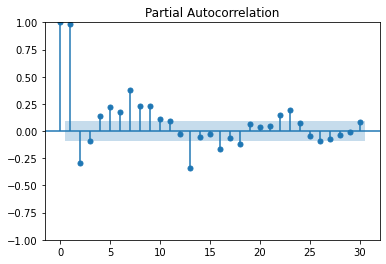

In [6]:
# plot_pacf (Partial Autocorrelation Function)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['GasProd'], lags=30)
plt.show()

In [7]:
#y is a label
y = df['GasProd']

# Train test split
y_train = y[:464]
y_test = y[464:]

# AutoReg = auto regression

In [8]:
#AutoReg = auto regression
from statsmodels.tsa.ar_model import AutoReg

# train autoregression
model = AutoReg(y_train,lags=12)
model_fit = model.fit()
print('Lag: %s' % model_fit.ar_lags)
print('Coefficients: %s' % model_fit.params)

Lag: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Coefficients: const          365.205379
GasProd.L1       0.608327
GasProd.L2       0.085825
GasProd.L3      -0.130728
GasProd.L4       0.018425
GasProd.L5       0.088364
GasProd.L6      -0.259818
GasProd.L7       0.119655
GasProd.L8       0.019010
GasProd.L9      -0.006119
GasProd.L10      0.149575
GasProd.L11      0.157039
GasProd.L12      0.161029
dtype: float64


In [9]:
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)

In [10]:
# RMSE for AutoReg
error = mean_squared_error(y_test, predictions)
print('Test RMSE: %.3f' % sqrt(error))

Test RMSE: 2640.652


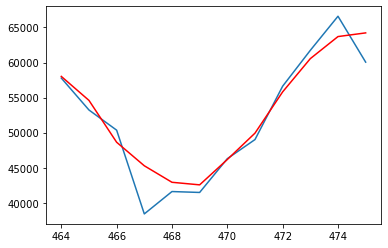

In [11]:
# plot results for predictions (test)
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

<AxesSubplot:>

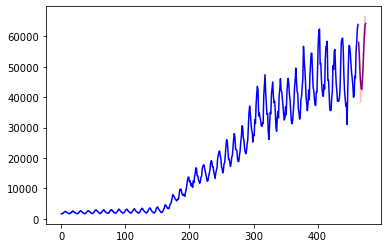

In [12]:
# plot combining training data and predictions
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

In [13]:
# RMSE for AutoReg
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 2640.652


# ARIMA (Moving Average)

In [14]:
########################## Moving Average ##############################
from statsmodels.tsa.arima.model import ARIMA

# train MA = moving average
model = ARIMA(y_train,order=(0,0,1)) #autoregressive =0, differences=0, moving average=1
#ordertuple, optional
#The (p,d,q) order of the model for the autoregressive, differences, and moving average components.
#d is always an integer, while p and q may either be integers or lists of integers.


model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)

Coefficients: const     2.062943e+04
ma.L1     9.057513e-01
sigma2    9.901638e+07
dtype: float64


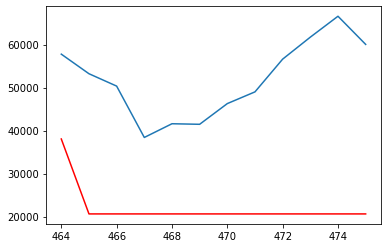

In [15]:
# plot results for predictions (test)
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

<AxesSubplot:>

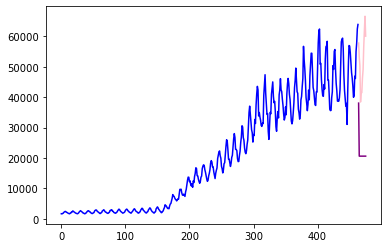

In [16]:
# plot combining training data and predictions
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

In [17]:
# RMSE for ARIMA
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 31148.798


# ARIMA

In [18]:
########################## ARIMA ##############################
from statsmodels.tsa.arima.model import ARIMA

# train ARMA
model = ARIMA(y_train,order=(7,0,0)) #autoregressive =7, differences=0, moving average=0
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)

Coefficients: const     2.062608e+04
ar.L1     1.068080e+00
ar.L2     6.865282e-02
ar.L3    -2.147973e-01
ar.L4    -4.132662e-02
ar.L5    -1.569537e-02
ar.L6    -3.424112e-01
ar.L7     4.751375e-01
sigma2    4.296124e+06
dtype: float64


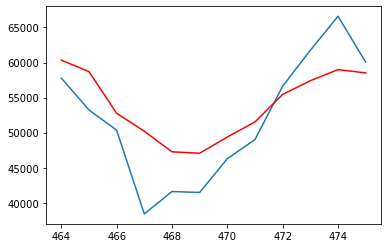

In [19]:
# plot results for predictions (test)
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

<AxesSubplot:>

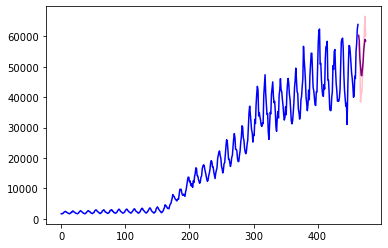

In [20]:
# plot combining training data and predictions
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

In [21]:
# RMSE for ARIMA
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 5331.867


# ARIMA

In [22]:
################# ARIMA ####################################
from statsmodels.tsa.arima.model import ARIMA

# train ARIMA
model = ARIMA(y_train,order=(3,1,0)) #autoregressive =3, differences=1, moving average=0
model_fit = model.fit()

print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(y_train), 
                                end=len(y_train)+len(y_test)-1, 
                                dynamic=False)

Coefficients: ar.L1     2.849865e-01
ar.L2     2.125378e-01
ar.L3    -1.874192e-01
sigma2    6.236909e+06
dtype: float64


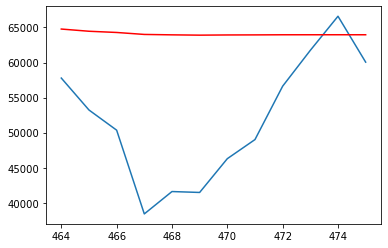

In [23]:
# plot results for predictions (test)
plt.plot(y_test)
plt.plot(predictions, color='red')
plt.show()

<AxesSubplot:>

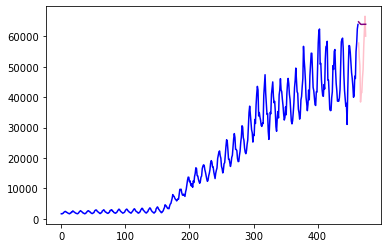

In [24]:
# plot combining training data and predictions
y_train.plot(color="blue")
y_test.plot(color="pink")
predictions.plot(color="purple")

In [25]:
# RMSE for ARIMA
rms = sqrt(mean_squared_error(y_test, predictions))
print('Test RMSE: %.3f' % rms)

Test RMSE: 14837.579


# auto_arima

In [26]:
# pmdarima is similar to GridSearchCV
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8355.224, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8632.352, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8589.946, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8603.593, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8631.502, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8571.932, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8577.053, Time=0.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=8328.114, Time=0.67 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=8426.154, Time=0.54 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8273.258, Time=0.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8404.298, Time=0.60 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8391.022, Time=0.86 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8

# SARMIA (seasonal=True)

In [27]:
### SARMIA (seasonal=True)
model = auto_arima(y_train, trace=True, error_action='ignore', 
                   suppress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8632.352, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8255.565, Time=0.59 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8438.509, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8631.502, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=8589.946, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.75 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=8172.997, Time=1.16 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=8438.053, Time=0.39 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=8218.643, Time=2.96 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=8231.156, Time=3.93 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=8371.138, Time=1.35 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.92 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=8219.426, Time=0.77 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [28]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

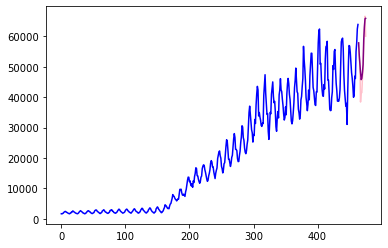

In [29]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.show()

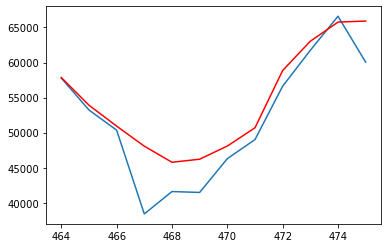

In [30]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

In [31]:
# RMSE for auto_arima
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 3892.905


# Next 6 Months Prediction using auto_arima

In [32]:
################# Next 6 Months Prediction ##############
#### Building model on the whole data
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8897.435, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8855.682, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8869.274, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8896.340, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8844.349, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=8827.088, Time=0.05 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=8787.281, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=8758.914, Time=0.12 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=8618.531, Time=0.73 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=8651.142, Time=0.65 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=8629.244, Time=0.85 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=8506.656, Time=0.83 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=i

In [33]:
import numpy as np
forecast = model.predict(n_periods=6)
forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
                        columns=['Prediction'])

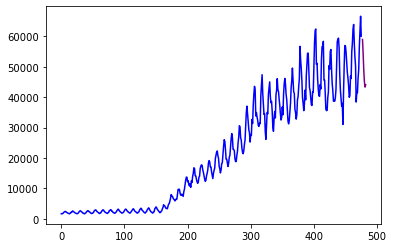

In [34]:
#plot the predictions for validation set
plt.plot(y, label='Train',color="blue")
plt.plot(forecast, label='Prediction',color="purple")
plt.show()